'We are not making any chages to the Anchor Box sizes using the default values'

In [1]:
from keras.models import load_model, Model
from yolo_utils import read_classes, read_anchors, generate_colors, preprocess_image, draw_boxes, scale_boxes

Using TensorFlow backend.


In [2]:
yolo_model = load_model("model_data/yolo.h5")   #You can download Yolo weights from anywhere you want to just google

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
yolo_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 608, 608, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 608, 608, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 608, 608, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 608, 608, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

In [4]:
image, image_data = preprocess_image("images/" + 'test.jpg', model_image_size = (608, 608))

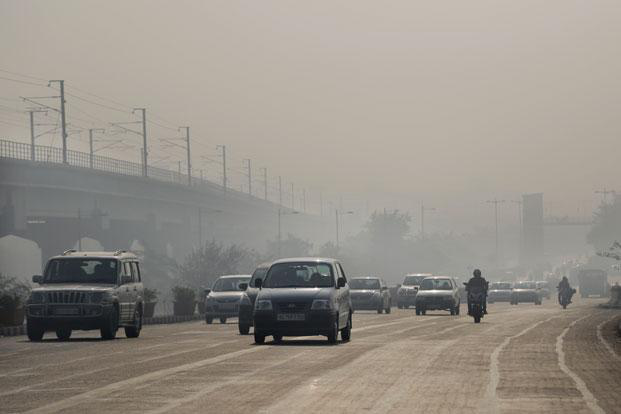

In [5]:
image

In [6]:
ans = yolo_model.predict(image_data)

In [7]:
len(ans[0][0][18]), 85*5

(425, 425)

In [41]:
ans.shape

(1, 19, 19, 425)

In [47]:
count = 0
boxes = []
for i in range(19):
    for k in range(19):
        for j in range(0,425,8):
            if ans[0][i][k][j] > 0.9:
                count += 1
                vec = list(ans[0][i][k][j+5:j+85])
                if vec != []:
                    if vec.index(max(vec)) == 2:
                        print('car found',ans[0][i][k][j+1:j+3],' In Block',i, ' where corner of this block is 0,0')
                        boxes.append([i,ans[0][i][k][j+1],ans[0][i][k][j+2]])
print(count, 'objects are detected as per yolo')

car found [3.8894632 2.8953984]  In Block 0  where corner of this block is 0,0
car found [5.1083665 3.6969028]  In Block 0  where corner of this block is 0,0
car found [3.1286972 2.4804163]  In Block 0  where corner of this block is 0,0
car found [1.7162929 0.7956531]  In Block 0  where corner of this block is 0,0
car found [5.7616134 1.7103344]  In Block 0  where corner of this block is 0,0
car found [2.2037523 2.756255 ]  In Block 1  where corner of this block is 0,0
car found [1.6213822 0.3831641]  In Block 1  where corner of this block is 0,0
car found [-1.6448786 -1.3792961]  In Block 1  where corner of this block is 0,0
car found [4.6073093 4.2896714]  In Block 1  where corner of this block is 0,0
car found [1.457682  2.7122297]  In Block 2  where corner of this block is 0,0
car found [2.0367992 4.9620805]  In Block 2  where corner of this block is 0,0
car found [2.5485482 6.7795706]  In Block 2  where corner of this block is 0,0
car found [1.9176105 7.387638 ]  In Block 2  where

In [48]:
class_names = ['person','bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie','suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier','toothbrush']

In [49]:
len(boxes)

88

In [ ]:
for i in range(boxes):
    